In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

from lusi.svm import EcocSVM
from lusi.invariants import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Get the data and split it in train and test
X, y = diabetes_df.drop('Outcome', axis=1).values, diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47)

In [4]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)


Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:24<00:00,  4.89it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:30<00:00,  4.74it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:47<00:00,  5.98it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:33<00:00,  4.69it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:47<00:00,  5.99it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:04<00:00,  5.43it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:55<00:00,  5.71it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:48<00:00,  5.94it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:58<00:00,  5.60it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:09<00:00,  5.26it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:22<00:00,  4.93it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:32<00:00,  4.71it/s]


[]

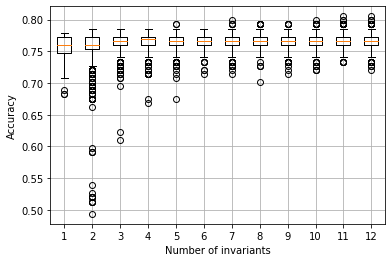

In [6]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

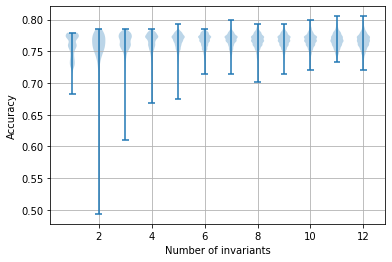

In [7]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [8]:
svm_baseline = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 167
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 179
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 2
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 198
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 6
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 200
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 13
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 181
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 15
Max. accuracy: 0.7922077922077922

Number of

In [9]:
# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.3)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:15<00:00,  7.36it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:23<00:00,  6.99it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:30<00:00,  6.65it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:41<00:00,  6.20it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:55<00:00,  5.70it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:20<00:00,  4.99it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:43<00:00,  4.47it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:17<00:00,  3.88it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [04:55<00:00,  3.38it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:52<00:00,  2.84it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [06:57<00:00,  2.39it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [08:07<00:00,  2.05it/s]


[]

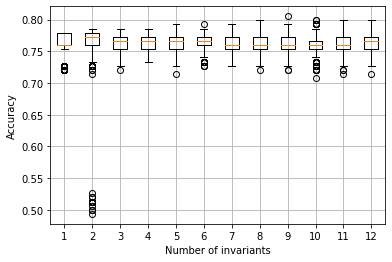

In [10]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

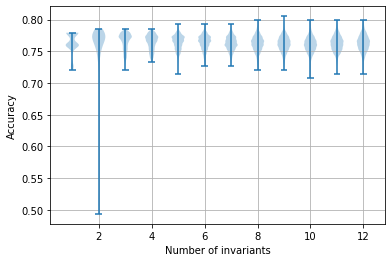

In [11]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [12]:
svm_baseline = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 333
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 320
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 1
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 214
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 6
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 156
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 11
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 112
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 18
Max. accuracy: 0.7922077922077922

Number of

# Trying different train/test partitions

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.61it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:41<00:00, 23.93it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.39it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.63it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:57<00:00, 17.37it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.33it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 14.96it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:13<00:00, 13.68it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:19<00:00, 12.53it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:27<00:00, 11.42it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:35<00:00, 10.52it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:45<00:00,  9.50it/s]


[]

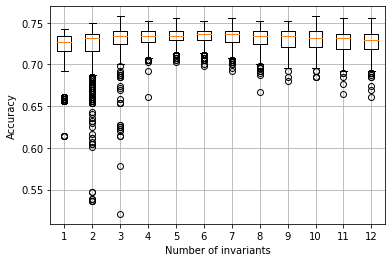

In [14]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

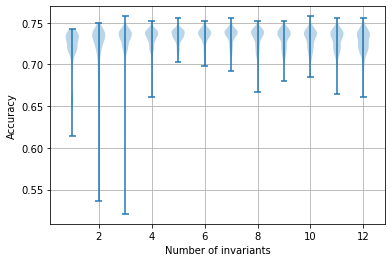

In [15]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [16]:
svm_baseline = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7421875

Number of elements with accuracy >= 0.7421875 using 1 invariants: 17
Number of elements with accuracy > 0.7421875 using 1 invariants: 0
Max. accuracy: 0.7421875

Number of elements with accuracy >= 0.7421875 using 2 invariants: 67
Number of elements with accuracy > 0.7421875 using 2 invariants: 17
Max. accuracy: 0.75

Number of elements with accuracy >= 0.7421875 using 3 invariants: 126
Number of elements with accuracy > 0.7421875 using 3 invariants: 41
Max. accuracy: 0.7578125

Number of elements with accuracy >= 0.7421875 using 4 invariants: 157
Number of elements with accuracy > 0.7421875 using 4 invariants: 58
Max. accuracy: 0.7526041666666666

Number of elements with accuracy >= 0.7421875 using 5 invariants: 183
Number of elements with accuracy > 0.7421875 using 5 invariants: 59
Max. accuracy: 0.7552083333333334

Number of elements with accuracy >= 0.7421875 using 6 invariants: 199
Number of elements with accuracy > 0.7421875 using 6 invariants: 97
Ma

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.38it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 43.80it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.29it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 33.00it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.81it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.76it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.72it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.49it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:55<00:00, 18.15it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.33it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.86it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.45it/s]


[]

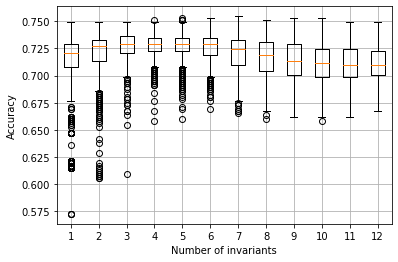

In [18]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

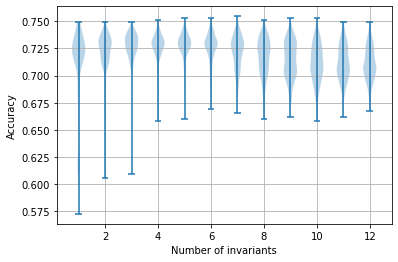

In [19]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [20]:
svm_baseline = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.741635687732342

Number of elements with accuracy >= 0.741635687732342 using 1 invariants: 65
Number of elements with accuracy > 0.741635687732342 using 1 invariants: 57
Max. accuracy: 0.7490706319702602

Number of elements with accuracy >= 0.741635687732342 using 2 invariants: 47
Number of elements with accuracy > 0.741635687732342 using 2 invariants: 33
Max. accuracy: 0.7490706319702602

Number of elements with accuracy >= 0.741635687732342 using 3 invariants: 96
Number of elements with accuracy > 0.741635687732342 using 3 invariants: 61
Max. accuracy: 0.7490706319702602

Number of elements with accuracy >= 0.741635687732342 using 4 invariants: 80
Number of elements with accuracy > 0.741635687732342 using 4 invariants: 50
Max. accuracy: 0.7509293680297398

Number of elements with accuracy >= 0.741635687732342 using 5 invariants: 90
Number of elements with accuracy > 0.741635687732342 using 5 invariants: 60
Max. accuracy: 0.7527881040892194

Number of elements wit

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 118.43it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.07it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.10it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.20it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 44.41it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 35.91it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:30<00:00, 33.09it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 29.00it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.64it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 22.95it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:48<00:00, 20.43it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.24it/s]


[]

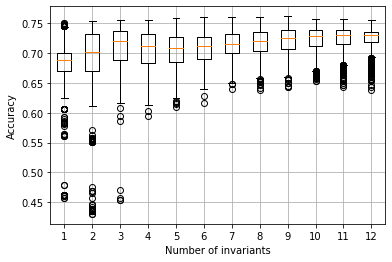

In [22]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

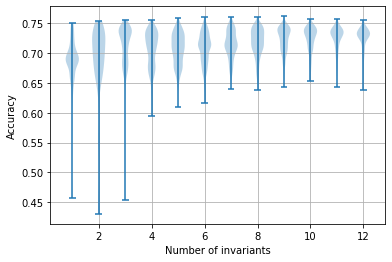

In [23]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [24]:
svm_baseline = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7456647398843931

Number of elements with accuracy >= 0.7456647398843931 using 1 invariants: 21
Number of elements with accuracy > 0.7456647398843931 using 1 invariants: 5
Max. accuracy: 0.75

Number of elements with accuracy >= 0.7456647398843931 using 2 invariants: 38
Number of elements with accuracy > 0.7456647398843931 using 2 invariants: 25
Max. accuracy: 0.7528901734104047

Number of elements with accuracy >= 0.7456647398843931 using 3 invariants: 75
Number of elements with accuracy > 0.7456647398843931 using 3 invariants: 54
Max. accuracy: 0.7557803468208093

Number of elements with accuracy >= 0.7456647398843931 using 4 invariants: 44
Number of elements with accuracy > 0.7456647398843931 using 4 invariants: 27
Max. accuracy: 0.7557803468208093

Number of elements with accuracy >= 0.7456647398843931 using 5 invariants: 48
Number of elements with accuracy > 0.7456647398843931 using 5 invariants: 33
Max. accuracy: 0.7586705202312138

Number of elements with ac

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
        svm_rp.fit(X_train_scaled, y_train, num_invariants=num_invariants)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 145.02it/s]


Running with 2 invariants...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 100.25it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.68it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.12it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.92it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:23<00:00, 41.90it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.01it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.72it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.21it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.57it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 21.88it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.53it/s]


[]

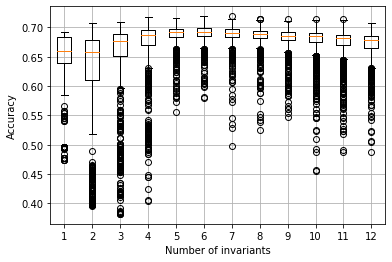

In [26]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

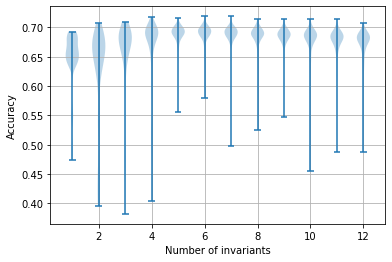

In [27]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [28]:
svm_baseline = EcocSVM(C=1, kernel='rbf', gamma='auto', delta=0.001)
svm_baseline.fit(X_train_scaled, y_train, num_invariants=0, tolerance=10)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.684931506849315

Number of elements with accuracy >= 0.684931506849315 using 1 invariants: 118
Number of elements with accuracy > 0.684931506849315 using 1 invariants: 115
Max. accuracy: 0.6931506849315069

Number of elements with accuracy >= 0.684931506849315 using 2 invariants: 176
Number of elements with accuracy > 0.684931506849315 using 2 invariants: 144
Max. accuracy: 0.7068493150684931

Number of elements with accuracy >= 0.684931506849315 using 3 invariants: 391
Number of elements with accuracy > 0.684931506849315 using 3 invariants: 346
Max. accuracy: 0.7095890410958904

Number of elements with accuracy >= 0.684931506849315 using 4 invariants: 596
Number of elements with accuracy > 0.684931506849315 using 4 invariants: 563
Max. accuracy: 0.7178082191780822

Number of elements with accuracy >= 0.684931506849315 using 5 invariants: 734
Number of elements with accuracy > 0.684931506849315 using 5 invariants: 708
Max. accuracy: 0.7164383561643836

Number of el